In [2]:
#Each row in the information's tidy data format represents one observation, while the columns contain the variable values.
#Following are explanations of the columns:
#-age: ages for all data points
#-sex: the gender of the ages in table
#-bmi: the body mass index of the sexs
#-childeren:in acordance to the age of of the sex where below 18 years is considered as a child
#-smoker: in accordance to the age  and gender whether the individual is asmoker or not
#-region:the region or place where the individual is coming from
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('insurance.csv')
features.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
#Identify Anomalies/ Missing Data
# Missing data can impact an analysis as can incorrect data or outliers.
#In this case, the missing data will not have a large effect, and the data quality is good because of the source
print('The shape of our features is:', features.shape)

The shape of our features is: (1338, 7)


In [4]:
#We can easily compute summary statistics to find anomalies.
# Descriptive statistics for each column
features.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(10)

,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,1,0,0,0,1
1,1,1,0,0,0,1,0
2,1,1,0,0,0,1,0
3,1,1,0,0,1,0,0
4,1,1,0,0,1,0,0
5,0,1,0,0,0,1,0
6,0,1,0,0,0,1,0
7,0,1,0,0,1,0,0
8,1,1,0,1,0,0,0
9,0,1,0,0,1,0,0


In [15]:
# code provides an overview of the data stored in a particular dataset.
#It displays information about the dataset including the number of columns, the data types for each column, the number of non-null values for each column, and the memory usage. 
#This information can be used to identify potential issues with the dataset, such as missing values or columns with incorrect data types.
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [18]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['age'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('age', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [19]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [20]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1003, 11)
Training Labels Shape: (1003,)
Testing Features Shape: (335, 11)
Testing Labels Shape: (335,)


In [22]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('bmi')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('bmi baseline error: ', round(np.mean(baseline_errors), 2))

bmi baseline error:  13.35


In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [25]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('age Absolute Error:', round(np.mean(errors), 2), 'degrees.')

age Absolute Error: 2.9 degrees.


In [26]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.02 %.


In [30]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
#At the top of the list is charges, the max charges of the age.
#This tells us the best predictor of the max charges for a age is the max chargws of the age, a rather intuitive finding. 
#The second most important factor is the historical average max bmi, also not that surprising.
#Your friend turns out to not be very helpful, along with the age, the  sex, the smoker, and the regions. 

Variable: charges              Importance: 0.81
Variable: bmi                  Importance: 0.08
Variable: children             Importance: 0.03
Variable: smoker_no            Importance: 0.03
Variable: smoker_yes           Importance: 0.03
Variable: sex_female           Importance: 0.0
Variable: sex_male             Importance: 0.0
Variable: region_northeast     Importance: 0.0
Variable: region_northwest     Importance: 0.0
Variable: region_southeast     Importance: 0.0
Variable: region_southwest     Importance: 0.0


In [36]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('charges'), feature_list.index('bmi')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
#This demonstrates that we don't truly need all the information we gathered to make reliable forecasts. 
#If we were to continue using this model, we could merely collect the two variables and attain approximately the same performance.
#In a production environment, we would have to balance the loss of accuracy against the additional time needed to gather more data.

Mean Absolute Error: 4.39 degrees.
Accuracy: 86.81 %.


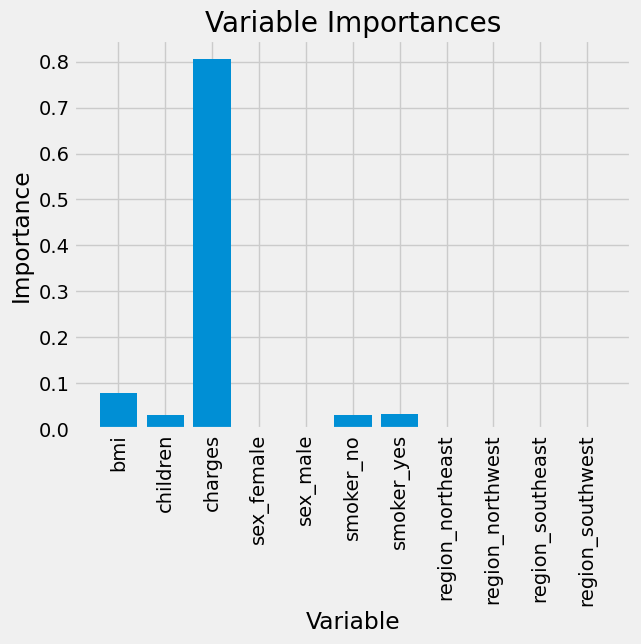

In [37]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
# we can plot the entire dataset with predictions highlighted. 
#This requires a little data manipulation, but its not too difficult. 
#We can use this plot to determine if there are any outliers in either the data or our predictions.